In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [2]:
#setting display options
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)
#reading training data
train = pd.read_csv('D:/Kaggle/Housing Problem/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape

(1460, 81)

In [4]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
test = pd.read_csv('D:/Kaggle/Housing Problem/test.csv')

In [6]:
test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
test_id = test['Id'].copy()
test_id.head()

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64

# Basic Data Information



C:\Users\sarra\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


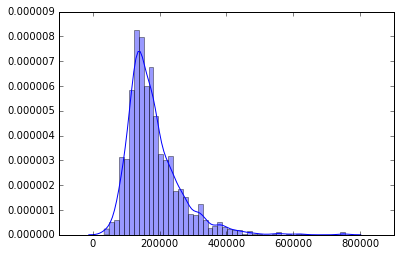

In [8]:
sns.distplot(train['SalePrice'].values)

In [9]:
print("Skwness is %f" % train['SalePrice'].skew())
print("Kurtosis is %f" % train['SalePrice'].kurt())

Skwness is 1.882876
Kurtosis is 6.536282


# Analysing relationships

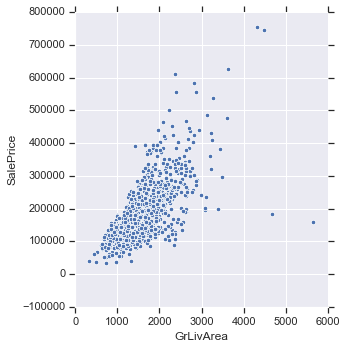

In [10]:
sns.set(style="darkgrid")
sns.relplot(x='GrLivArea',y='SalePrice',data=train)

In [11]:
train[train['GrLivArea'] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


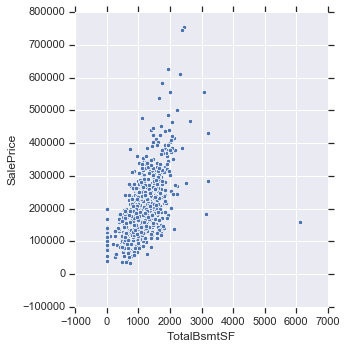

In [12]:
sns.relplot(x='TotalBsmtSF',y='SalePrice',data=train)

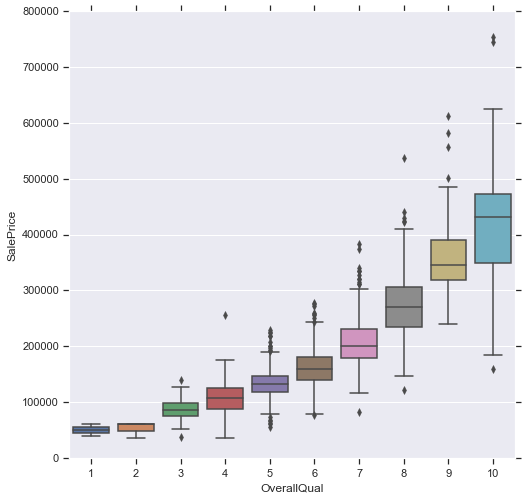

In [13]:
f , ax = plt.subplots(figsize=(8,8))
sns.boxplot(x='OverallQual',y='SalePrice',data=train)

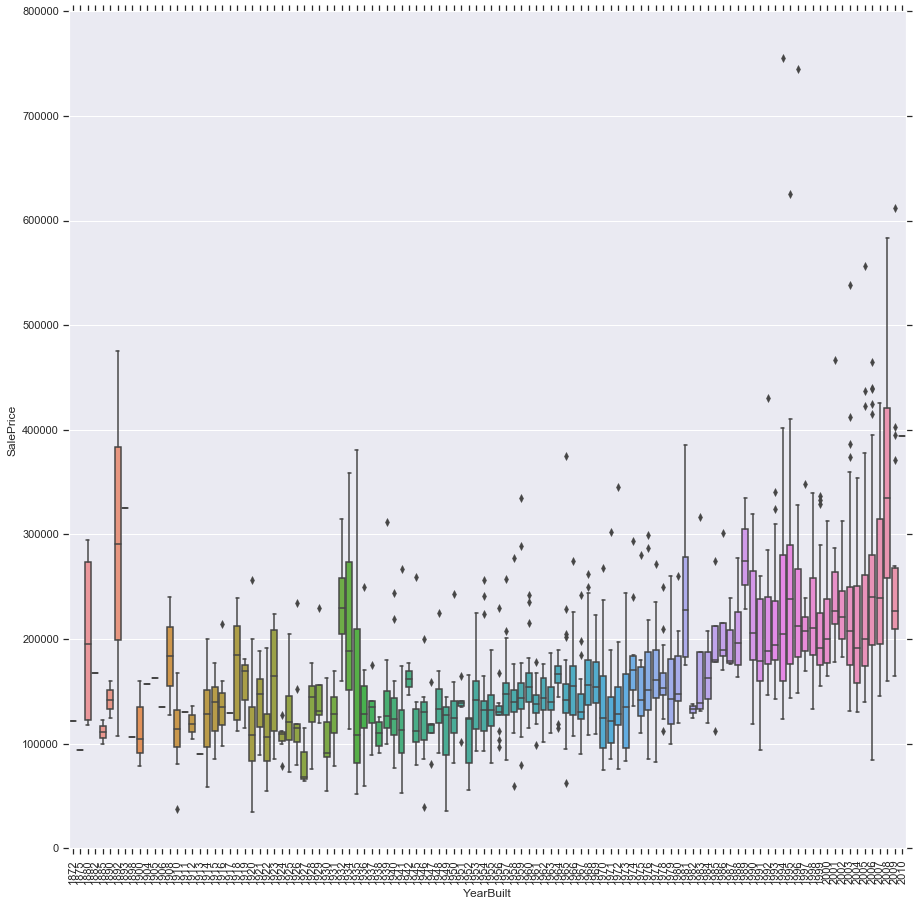

In [14]:
f , ax = plt.subplots(figsize=(15,15))
sns.boxplot(x='YearBuilt',y='SalePrice',data=train)
plt.xticks(rotation=90);

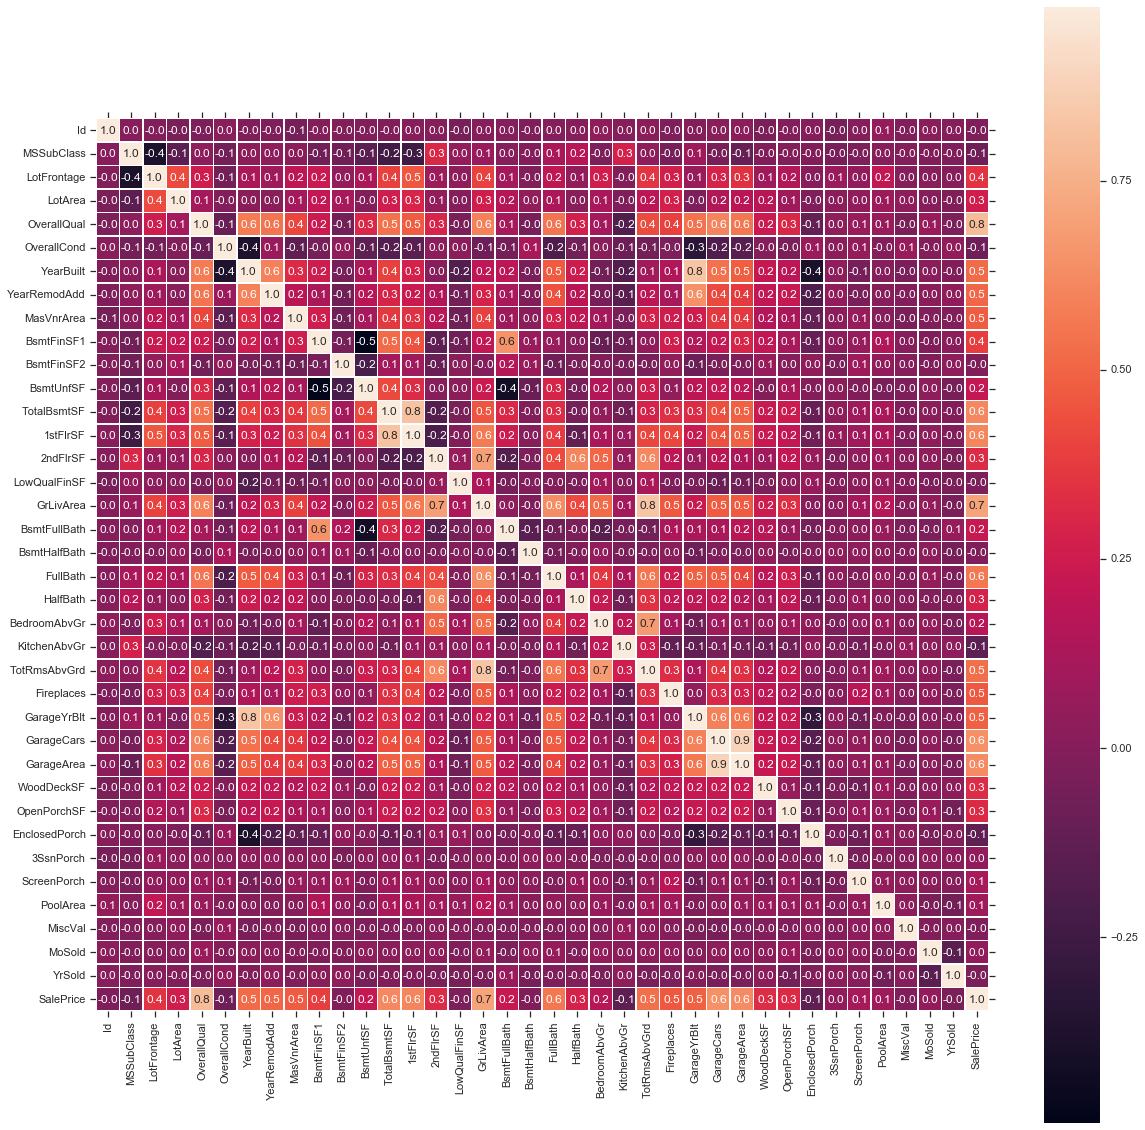

In [15]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.98, annot= True, linewidths = 0.5, fmt = '.01f', square=True, ax = ax);

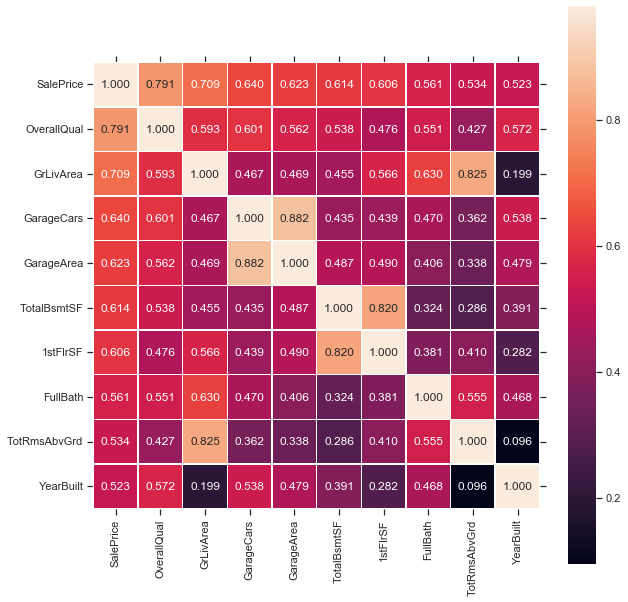

In [16]:
#using nalragest feature of pandas as corrmat itself is a dataframe
cols =  corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
more_corr_f = train[cols].copy()
corr_mf = more_corr_f.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_mf, vmax=.98, annot= True, linewidths = 0.5, fmt = '.03f', square=True, ax = ax)
plt.show()

we can see correlation among some of the variable.  
* GarageArea and GarageCars
* GrLivArea and TotRmsAbvGrd
* 1stFlrSF and TotalBsmtSF

Choosing amaong these, we choose variables with high correlation to Saleprice

In [17]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

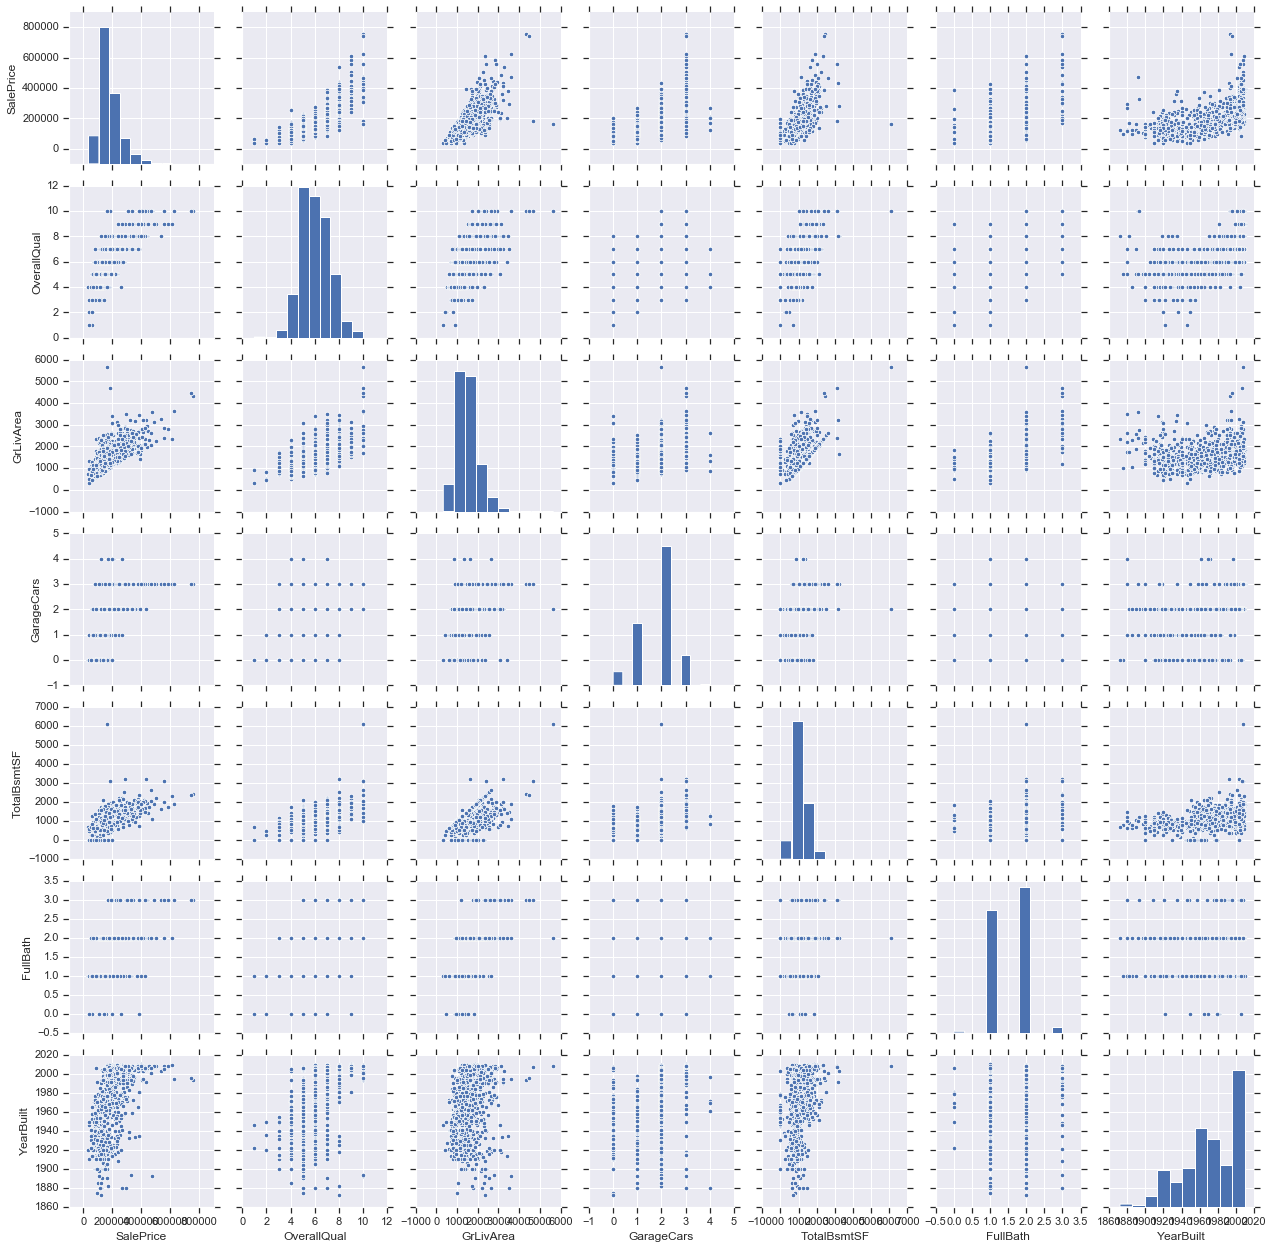

In [18]:
sns.pairplot(train[cols],height=2.5)

Let us look closer to these variables

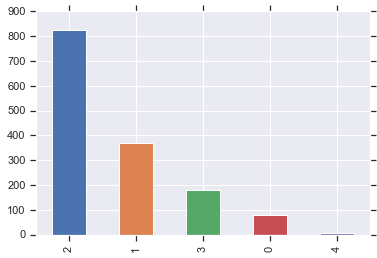

In [19]:
train.GarageCars.value_counts().plot.bar()

81 houses have no garage, most of the houses can accomodate 1 or 2 cars, 2 being the mode
We can also see some kind of relationship between GrLivArea and TotalBsmtSF which is fan shaped 

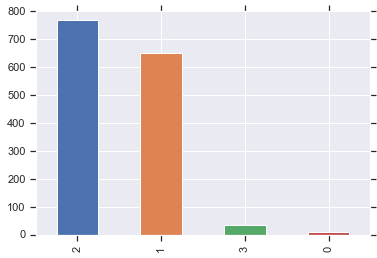

In [20]:
train.FullBath.value_counts().plot.bar()

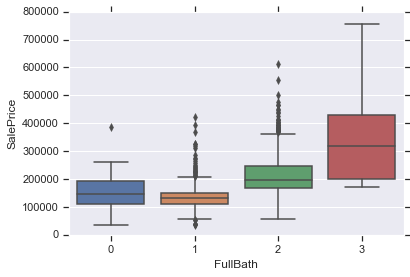

In [21]:
sns.boxplot(x='FullBath',y='SalePrice',data=train)

A trend can be seen with FullBath i.e. Price increases with increase in number of full bath. 

# Missing Data

In [22]:
total = (train.isnull().sum()).sort_values(ascending=False).astype('float64')
total = total.loc[total > 0]
per_total = (((train.isnull().sum()) / 1460)*100).sort_values(ascending=False)
per_total = per_total.loc[per_total > 0]
missing_cols = pd.concat([total,per_total],axis=1,keys=['Total','Percentage'])
missing_cols = missing_cols[missing_cols >0]
missing_cols

,Total,Percentage
PoolQC,1453.0,99.520548
MiscFeature,1406.0,96.301370
Alley,1369.0,93.767123
Fence,1179.0,80.753425
FireplaceQu,690.0,47.260274
LotFrontage,259.0,17.739726
GarageCond,81.0,5.547945
GarageType,81.0,5.547945
GarageYrBlt,81.0,5.547945
GarageFinish,81.0,5.547945


While merging or concatinating pandas if 0 is there in both series it will go NAN

In [23]:
(train.std()/train.mean())*100 #percentage deviation from mean

Id               57.715265  
MSSubClass       74.345532  
LotFrontage      34.667760  
LotArea          94.907560  
OverallQual      22.674621  
OverallCond      19.959300  
YearBuilt        1.532156   
YearRemodAdd     1.040141   
MasVnrArea       174.630612 
BsmtFinSF1       102.808217 
BsmtFinSF2       346.555632 
BsmtUnfSF        77.897651  
TotalBsmtSF      41.487905  
1stFlrSF         33.251235  
2ndFlrSF         125.803433 
LowQualFinSF     831.943032 
GrLivArea        34.674561  
BsmtFullBath     121.998307 
BsmtHalfBath     414.974838 
FullBath         35.200747  
HalfBath         131.343946 
BedroomAbvGr     28.459640  
KitchenAbvGr     21.053257  
TotRmsAbvGrd     24.937728  
Fireplaces       105.163455 
GarageYrBlt      1.247897   
GarageCars       42.289919  
GarageArea       45.203768  
WoodDeckSF       132.993190 
OpenPorchSF      141.996654 
EnclosedPorch    278.395024 
3SsnPorch        859.849390 
ScreenPorch      370.211589 
PoolArea         1456.277759
MiscVal       

## Inspecting Variables attributed to one part of the house : -
* Garage
* Basement

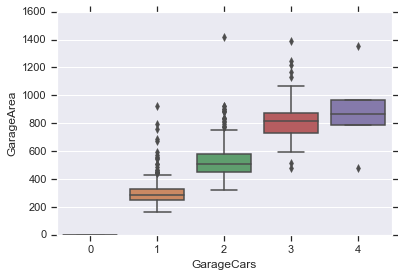

In [24]:
sns.boxplot(x='GarageCars',y='GarageArea',data=train)

A strong relationship can be seen above. We can drop one of them.

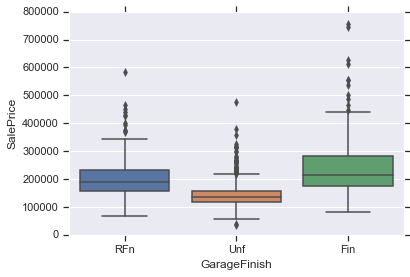

In [25]:
sns.boxplot(x='GarageFinish',y='SalePrice',data=train)

In [26]:
train.GarageCond.value_counts()

TA    1326
Fa    35  
Gd    9   
Po    7   
Ex    2   
Name: GarageCond, dtype: int64

Not much variation. Biased to one single class i.e. average. Can be dropped

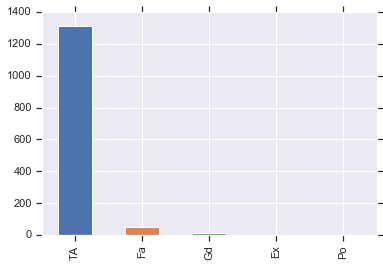

In [27]:
train.GarageQual.value_counts().plot.bar()

Same as in case of garage condition. Can be dropped

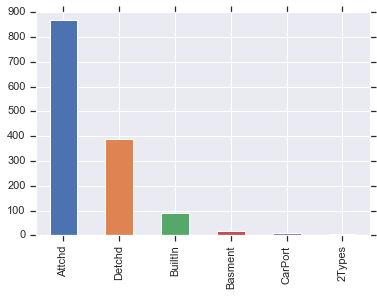

In [28]:
train.GarageType.value_counts().plot.bar()

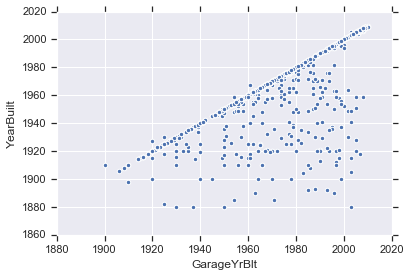

In [29]:
train[['GarageYrBlt','YearBuilt']].plot.scatter(x='GarageYrBlt',y='YearBuilt')

In [30]:
len(train[train['GarageYrBlt'] == train['YearBuilt']])

1089

Garage Year Built and Year Built are highly correlated. We can remove Garage Built.

Now Analysing basement variables

## Doing to some basic prep to make things easy

In [31]:
catvar_list = train.select_dtypes(['object']).columns.values.tolist()

In [32]:
print catvar_list

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [33]:
numvar_list = train.select_dtypes(['int64','float64']).columns.values.tolist()

In [34]:
len(numvar_list) + len(catvar_list)

81

In [35]:
bs_var = [x for x in catvar_list if 'Bsmt' in x] + [x for x in numvar_list if 'Bsmt' in x]
print bs_var

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']


In [36]:
print train.BsmtCond.value_counts()
print train.BsmtQual.value_counts()
print train.BsmtExposure.value_counts()

TA    1311
Gd    65  
Fa    45  
Po    2   
Name: BsmtCond, dtype: int64
TA    649
Gd    618
Ex    121
Fa    35 
Name: BsmtQual, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


Basement Condition can be dropped as one single level dominates

In [37]:
print train.BsmtFinType1.value_counts()
print train.BsmtFinType2.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ    74 
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec    54  
LwQ    46  
BLQ    33  
ALQ    19  
GLQ    14  
Name: BsmtFinType2, dtype: int64


Basement type 2 can be dropped

In [38]:
train[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].head(3)

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,706,0,150,856,1,0
1,978,0,284,1262,0,1
2,486,0,434,920,1,0


* We can see that TotalBsmtSF is sum of BsmtFin1 , BsmtFin2, BsmtUnSF
* We can drop these three

## Analysing and removing variables

In [39]:
missing_cols[:5]

,Total,Percentage
PoolQC,1453.0,99.520548
MiscFeature,1406.0,96.301370
Alley,1369.0,93.767123
Fence,1179.0,80.753425
FireplaceQu,690.0,47.260274


In [40]:
train.groupby("FireplaceQu")['SalePrice'].mean().sort_values()

FireplaceQu
Po    129764.150000
Fa    167298.484848
TA    205723.488818
Gd    226351.415789
Ex    337712.500000
Name: SalePrice, dtype: float64

In [41]:
train.loc[train["FireplaceQu"].isnull(),'SalePrice'].mean()

141331.48260869566

I was thinking of dropping FirePlaceQC but it appears with better quality we can see increase in price mean. It better not to have than a poor one

In [42]:
t1 = train.copy()

In [43]:
t1.shape[0]

1460

In [44]:
# I am removing these variables as tehy are imbalanced and is biased or are highly correlated to some other variable
to_rm_lot1 = ['GarageCond','GarageQual','GarageYrBlt','TotRmsAbvGrd','GarageCars','BsmtFinSF1',
              'BsmtFinSF2', 'BsmtUnfSF','BsmtFinType2'] + ['Id']

In [45]:
to_rm_lot1

['GarageCond',
 'GarageQual',
 'GarageYrBlt',
 'TotRmsAbvGrd',
 'GarageCars',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFinType2',
 'Id']

In [46]:
to_rm_lot2 = list(missing_cols[:4].index)

Cleaning train data from abbove bivariate analysis on GrLivingArea and TotalBsmtSF

In [47]:
t1 = t1.loc[(train['GrLivArea'] < 4000) & (train['SalePrice'] < 600000)]
t1.shape

(1454, 81)

In [48]:
t1.loc[t1['TotalBsmtSF'] < 4000].shape

(1454, 81)

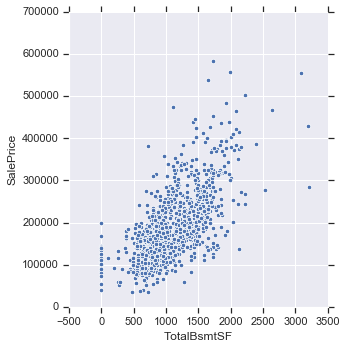

In [49]:
sns.relplot(x='TotalBsmtSF',y='SalePrice',data=t1)

Now outliars removed

Now creating x^2 and x^3 and sqrt(x) and analysing relationship with SalePrice for all numeric variable except one we want 
to remove. Earlier corr only gave us linear relationship. Checking if there is any higher degree relationship.

In [50]:
col_num_list = [x for x in numvar_list if x not in to_rm_lot1 and x not in to_rm_lot2 ]
print col_num_list

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [51]:
t1["LotFrontage"] = t1.groupby("Neighborhood")["LotFrontage"].transform(lambda x : x.fillna(x.median()))
t1[col_num_list].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [52]:
for cl in col_num_list:
    t1[cl + '2'] = t1[cl].apply(lambda x : x**2)
    t1[cl + '3'] = t1[cl].apply(lambda x : x**3)
    t1[cl + '_sqrt'] = t1[cl].apply(lambda x : np.sqrt(x))
t1.shape

(1454, 174)

In [53]:
cols = list(train)
t1cols = list(t1)

In [54]:
new_var = [x for x in t1cols if x not in cols]


In [55]:
new_var = new_var + ['SalePrice']

In [56]:
new_var.remove('SalePrice')

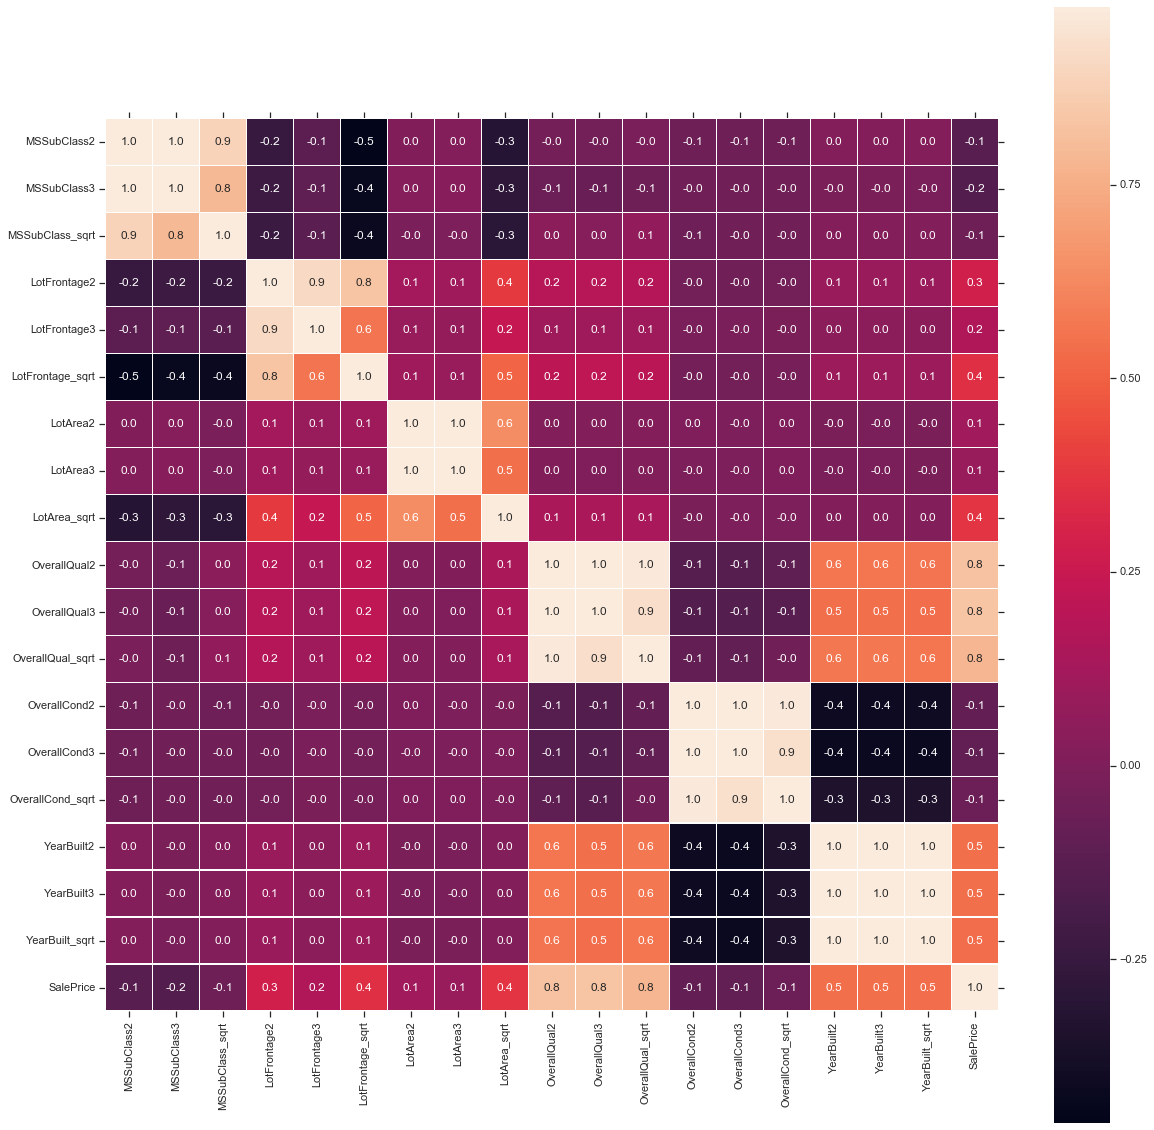

In [57]:
corr1 = t1[new_var[:18]+['SalePrice']].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr1, vmax=.98, annot= True, linewidths = 0.5, fmt = '.01f', square=True, ax = ax);

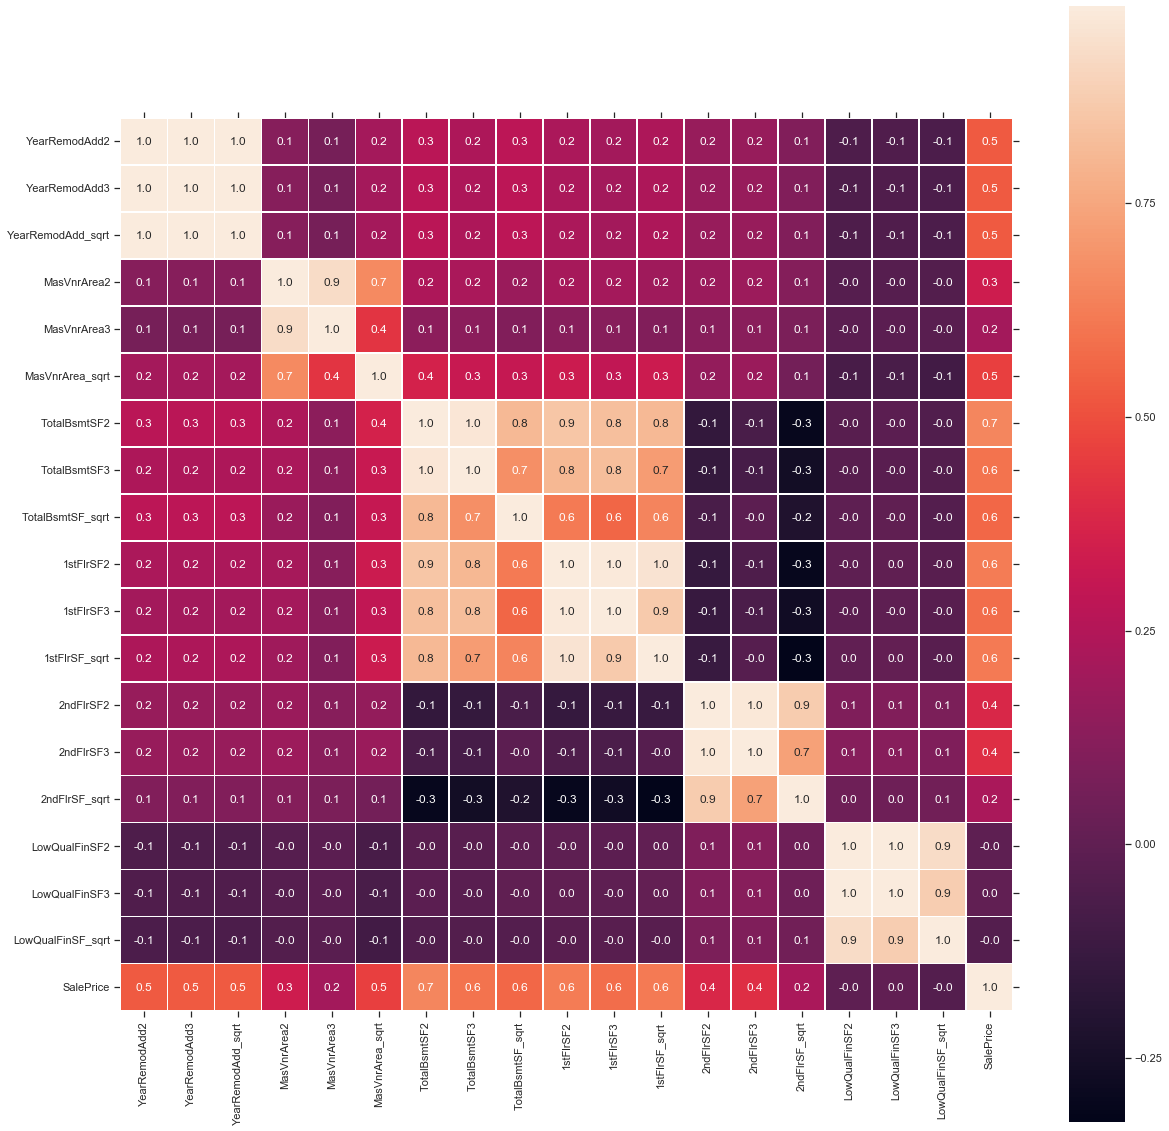

In [58]:
corr2 = t1[new_var[18:36]+['SalePrice']].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr2, vmax=.98, annot= True, linewidths = 0.5, fmt = '.01f', square=True, ax = ax);

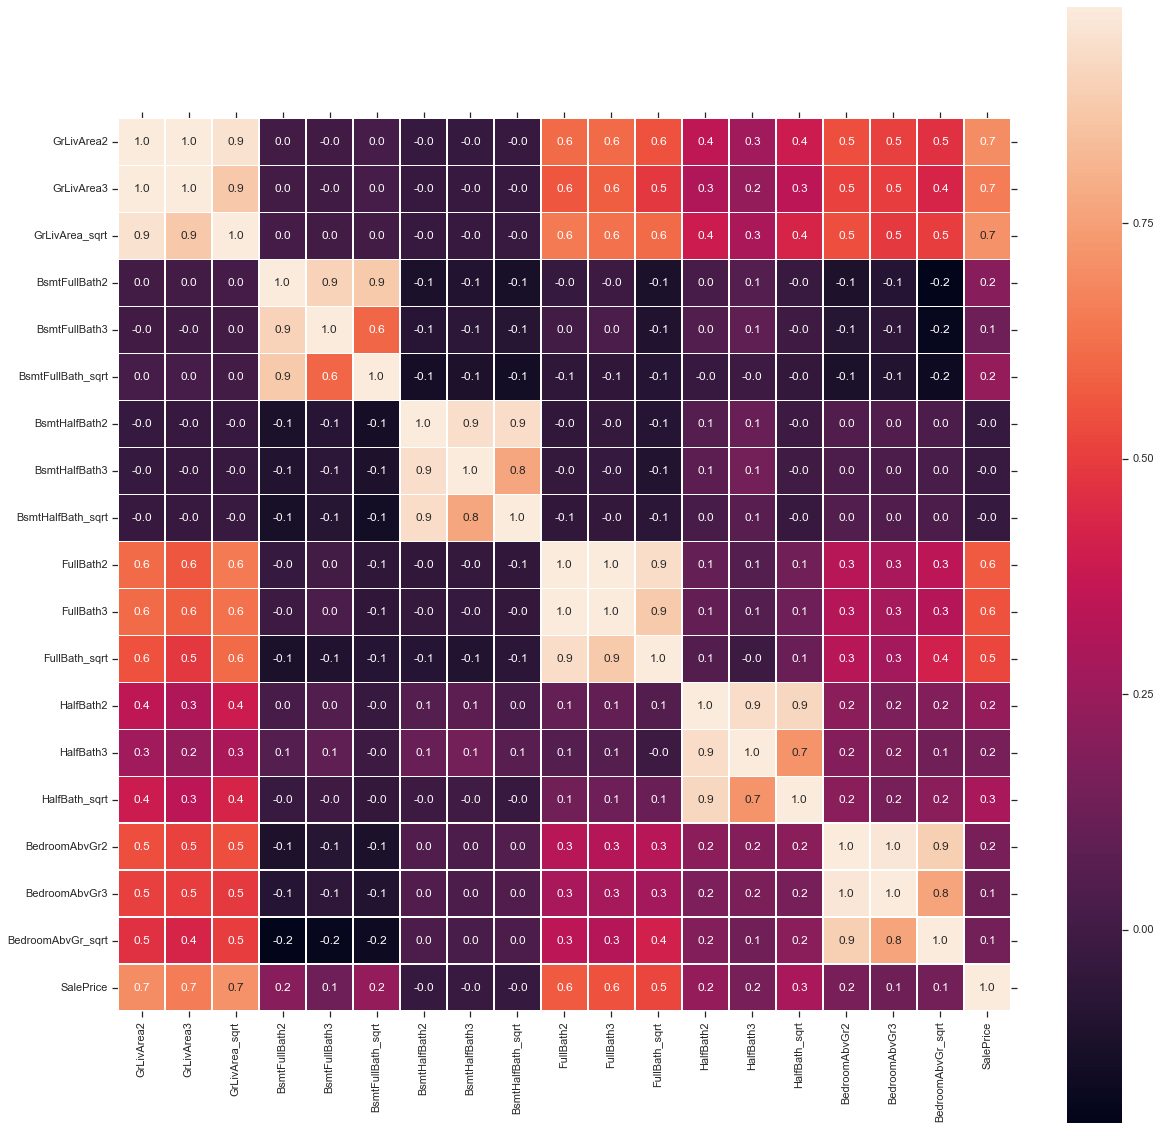

In [59]:
corr3 = t1[new_var[36:54]+['SalePrice']].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr3, vmax=.98, annot= True, linewidths = 0.5, fmt = '.01f', square=True, ax = ax);

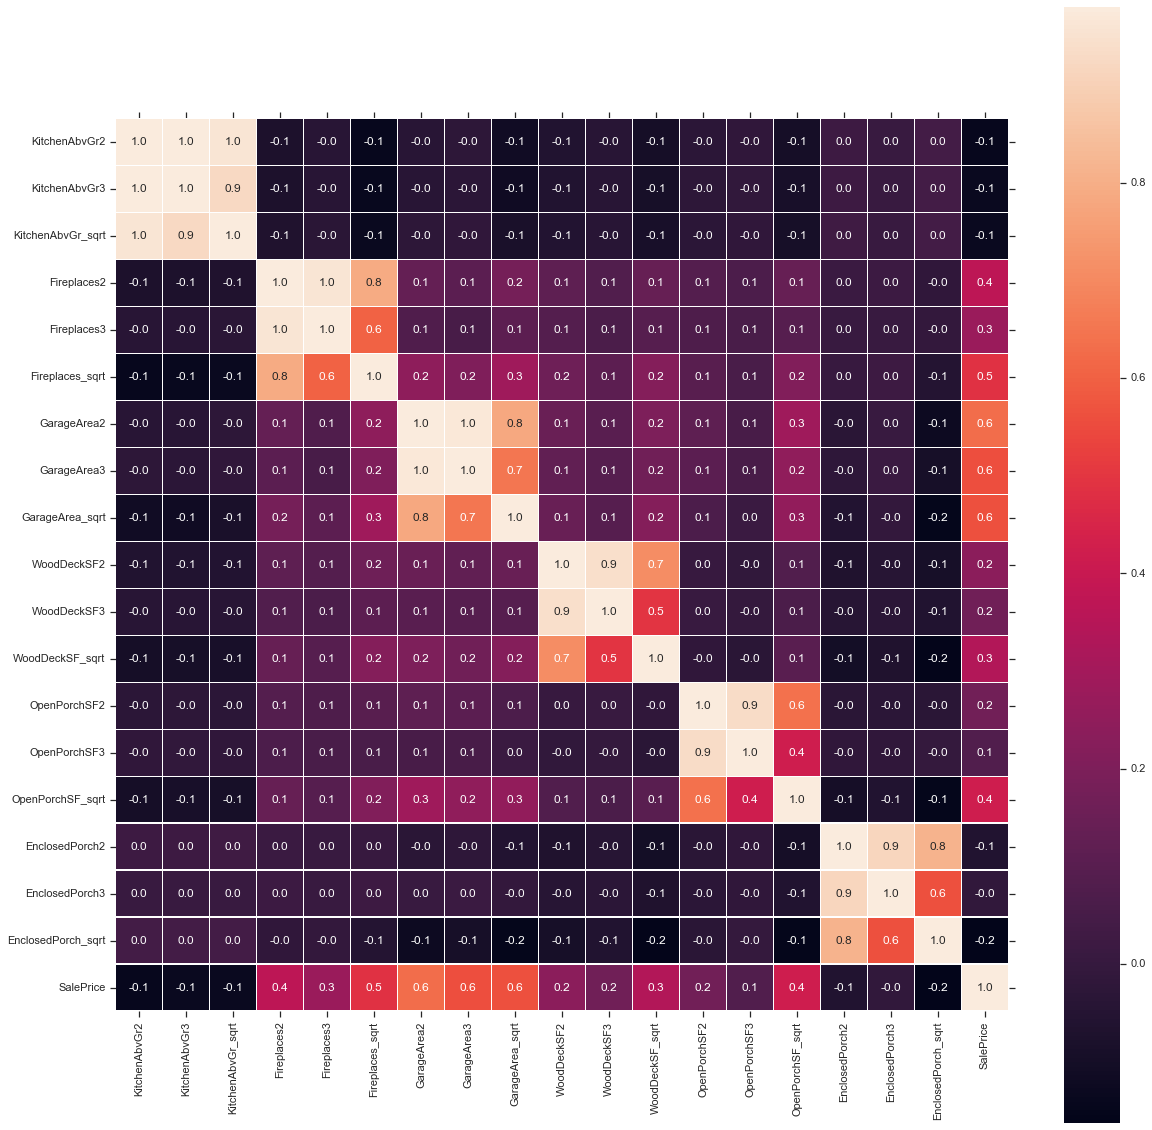

In [60]:
corr4 = t1[new_var[54:72]+['SalePrice']].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr4, vmax=.98, annot= True, linewidths = 0.5, fmt = '.01f', square=True, ax = ax);

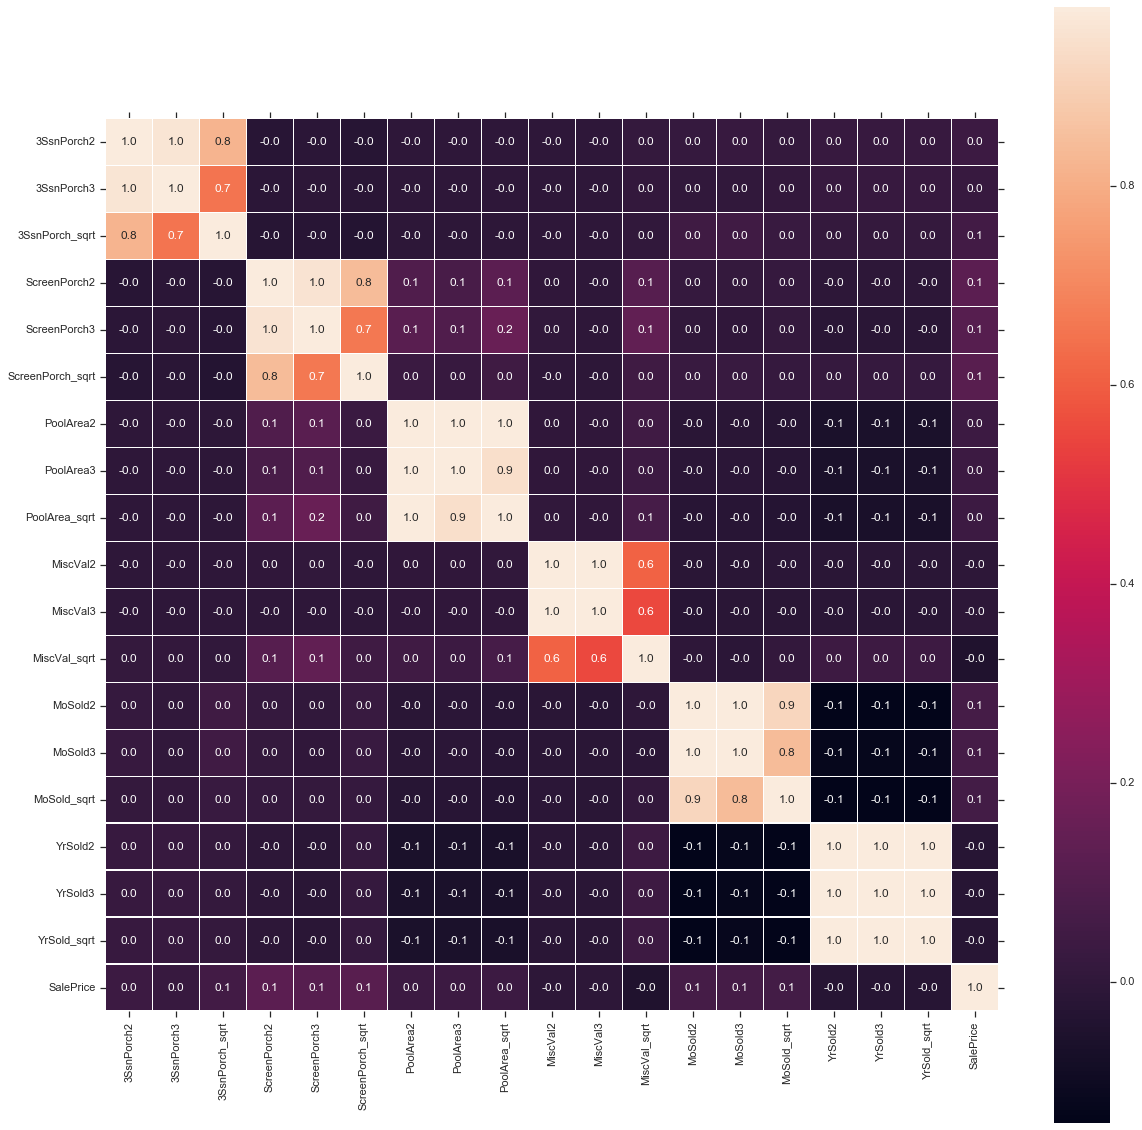

In [61]:
corr5 = t1[new_var[72:90]+['SalePrice']].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr5, vmax=.98, annot= True, linewidths = 0.5, fmt = '.01f', square=True, ax = ax);

In [62]:
least_corr_linear = list(corrmat.index[abs(corrmat['SalePrice'] < 0.3)])

In [63]:
corrmat.loc[abs(corrmat['SalePrice'] > 0.3),'SalePrice']

LotFrontage     0.351799
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [64]:
train['SalePrice_log'] = train['SalePrice'].apply(lambda x : np.sqrt(x))

In [65]:
train['TotalArea'] = train.GrLivArea + train.TotalBsmtSF
corr7 = train[['SalePrice','TotalArea']].corr()
corr7

,SalePrice,TotalArea
SalePrice,1.000000,0.778959
TotalArea,0.778959,1.000000


In [66]:
train[['1stFlrSF','2ndFlrSF','GrLivArea']].head()

,1stFlrSF,2ndFlrSF,GrLivArea
0,856,854,1710
1,1262,0,1262
2,920,866,1786
3,961,756,1717
4,1145,1053,2198


In [67]:
#1st + 2nd = GrLiv and GrLiv + TBsmt is Total Area, we can rest
to_rm_lot3 = ['1stFlrSF','2ndFlrSF','GrLivArea','TotalBsmtSF'] 

In [68]:
train[[x for x in cols if 'Bath' in x]+['SalePrice']].isnull().sum()

BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64

In [69]:
train['TotalBath'] = train.BsmtHalfBath + train.BsmtFullBath + train.FullBath + train.HalfBath
train[['SalePrice','TotalBath']].corr()

,SalePrice,TotalBath
SalePrice,1.000000,0.613005
TotalBath,0.613005,1.000000


In [70]:
to_rm_lot4 = [x for x in cols if 'Bath' in x]
print to_rm_lot4

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']


In [71]:
train.TotalBath.isnull().sum()

0

In [72]:
mis_t = test.isnull().sum() 
mis_t = mis_t[mis_t > 0]

In [73]:
train.shape

(1460, 84)

In [74]:
train['SalePrice_log'] = np.log(train['SalePrice'])

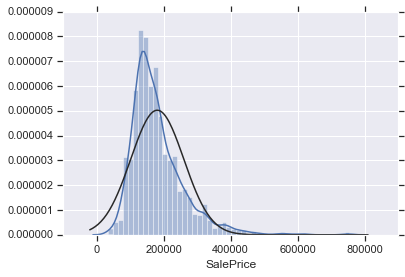

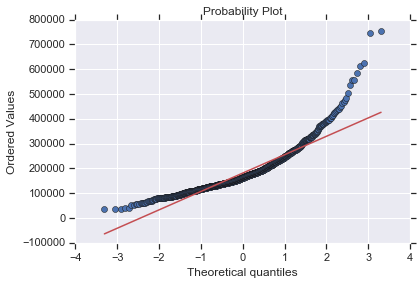

In [75]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

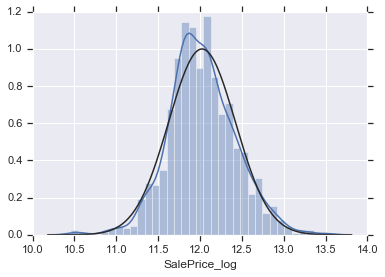

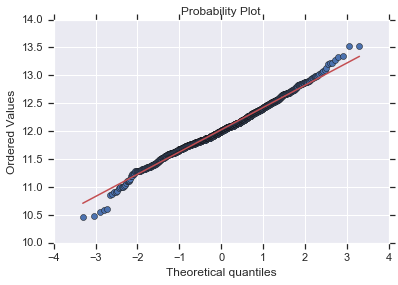

In [76]:
sns.distplot(train['SalePrice_log'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice_log'], plot=plt)

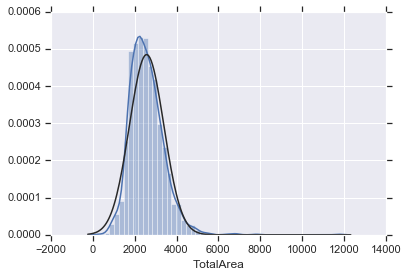

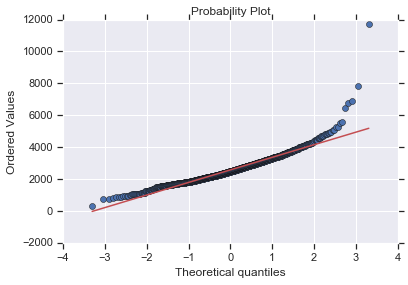

In [77]:
sns.distplot(train['TotalArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalArea'], plot=plt)

In [78]:
train = train.loc[(train['GrLivArea'] < 4000) & (train['SalePrice'] < 600000)]

In [79]:
mis_t

MSZoning        4   
LotFrontage     227 
Alley           1352
Utilities       2   
Exterior1st     1   
Exterior2nd     1   
MasVnrType      16  
MasVnrArea      15  
BsmtQual        44  
BsmtCond        45  
BsmtExposure    44  
BsmtFinType1    42  
BsmtFinSF1      1   
BsmtFinType2    42  
BsmtFinSF2      1   
BsmtUnfSF       1   
TotalBsmtSF     1   
BsmtFullBath    2   
BsmtHalfBath    2   
KitchenQual     1   
Functional      2   
FireplaceQu     730 
GarageType      76  
GarageYrBlt     78  
GarageFinish    78  
GarageCars      1   
GarageArea      1   
GarageQual      78  
GarageCond      78  
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType        1   
dtype: int64

In [80]:
test.TotalBsmtSF.fillna(0,inplace=True)
test.BsmtFullBath.fillna(0,inplace=True)
test.BsmtHalfBath.fillna(0,inplace=True)

In [81]:
mis_t = test.isnull().sum() 
mis_t[mis_t > 0]

MSZoning        4   
LotFrontage     227 
Alley           1352
Utilities       2   
Exterior1st     1   
Exterior2nd     1   
MasVnrType      16  
MasVnrArea      15  
BsmtQual        44  
BsmtCond        45  
BsmtExposure    44  
BsmtFinType1    42  
BsmtFinSF1      1   
BsmtFinType2    42  
BsmtFinSF2      1   
BsmtUnfSF       1   
KitchenQual     1   
Functional      2   
FireplaceQu     730 
GarageType      76  
GarageYrBlt     78  
GarageFinish    78  
GarageCars      1   
GarageArea      1   
GarageQual      78  
GarageCond      78  
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType        1   
dtype: int64

In [82]:
test['TotalBath'] = test.BsmtHalfBath + test.BsmtFullBath + test.FullBath + test.HalfBath

In [83]:
test['TotalArea'] = test.GrLivArea + test.TotalBsmtSF

In [84]:
ntr = train.shape[0]

In [85]:
all_data = pd.concat([train, test]).reset_index(drop=True)

C:\Users\sarra\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [86]:
least_corr_linear

['Id',
 'MSSubClass',
 'LotArea',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [87]:
to_rm_lot1

['GarageCond',
 'GarageQual',
 'GarageYrBlt',
 'TotRmsAbvGrd',
 'GarageCars',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFinType2',
 'Id']

In [88]:
to_rm_lot1 = [x for x in to_rm_lot1 if x not in least_corr_linear]

In [89]:
all_lots = least_corr_linear + to_rm_lot1 + to_rm_lot2 + to_rm_lot3 + to_rm_lot4
print all_lots

['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageCond', 'GarageQual', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars', 'BsmtFinSF1', 'BsmtFinType2', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']


In [90]:
len(all_lots)

38

In [91]:
all_data.shape

(2913, 84)

In [92]:
all_data.drop(all_lots,inplace=True,axis=1)

In [93]:
all_data.shape

(2913, 49)

In [94]:
missing_total = all_data.isnull().sum()
missing_total = missing_total[missing_total >0]

In [95]:
totalall = (all_data.isnull().sum()).sort_values(ascending=False).astype('float64')
totalall = totalall.loc[totalall > 0]
per_totalall = (((all_data.isnull().sum()) / len(all_data))*100).sort_values(ascending=False)
per_totalall = per_totalall.loc[per_totalall > 0]
missing_cols_all = pd.concat([totalall,per_totalall],axis=1,keys=['Total','Percentage'])
missing_cols_all = missing_cols_all[missing_cols_all >0]
missing_cols_all

,Total,Percentage
SalePrice_log,1459.0,50.085822
SalePrice,1459.0,50.085822
FireplaceQu,1420.0,48.746996
LotFrontage,486.0,16.683831
GarageFinish,159.0,5.458290
GarageType,157.0,5.389633
BsmtCond,82.0,2.814967
BsmtExposure,82.0,2.814967
BsmtQual,81.0,2.780639
BsmtFinType1,79.0,2.711981


In [96]:
all_data.MasVnrType.value_counts()

None       1741
BrkFace    877 
Stone      246 
BrkCmn     25  
Name: MasVnrType, dtype: int64

In [97]:
train.SaleType.value_counts()

WD       1264
New      119 
COD      43  
ConLD    9   
ConLw    5   
ConLI    5   
CWD      4   
Oth      3   
Con      2   
Name: SaleType, dtype: int64

In [98]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x : x.fillna(x.median()))

In [99]:
all_data.GarageFinish.fillna('None',inplace=True)

In [100]:
all_data.GarageType.fillna('None',inplace=True)

In [101]:
all_data.BsmtCond.fillna('None',inplace=True)
all_data.BsmtQual.fillna('None',inplace=True)
all_data.BsmtExposure.fillna('None',inplace=True)
all_data.BsmtFinType1.fillna('None',inplace=True)

In [102]:
all_data.MasVnrType.fillna('None',inplace=True)
all_data.MasVnrArea.fillna(0,inplace=True)

In [103]:
all_data.drop(['Utilities'],axis=1,inplace=True)

In [104]:
all_data.MSZoning.fillna(all_data.MSZoning.mode()[0],inplace=True)

In [105]:
all_data.drop(['Functional'],axis=1,inplace=True)

Dropped Functional and Utilities due to high imbalance in level, one level has more than 90% data

In [106]:
all_data.GarageArea.fillna(all_data.loc[all_data["GarageType"] == "Detchd","GarageArea"].median(),inplace=True)

In [107]:
all_data.KitchenQual.fillna(all_data.KitchenQual.mode()[0],inplace=True)

In [108]:
train.CentralAir.value_counts()

Y    1359
N    95  
Name: CentralAir, dtype: int64

In [109]:
all_data.drop(['CentralAir'],axis=1,inplace=True)

In [110]:
all_data.Electrical.value_counts()

SBrkr    2665
FuseA    188 
FuseF    50  
FuseP    8   
Mix      1   
Name: Electrical, dtype: int64

In [111]:
all_data.drop(['Electrical'],axis=1,inplace=True)

In [112]:
all_data.Exterior1st.fillna(all_data.Exterior1st.mode()[0],inplace=True)
all_data.Exterior2nd.fillna(all_data.Exterior2nd.mode()[0],inplace=True)

In [113]:
all_data.drop(['SaleType'],axis=1,inplace=True)


In [114]:
totalall2 = (all_data.isnull().sum()).sort_values(ascending=False).astype('float64')
totalall2 = totalall2.loc[totalall2 > 0]
totalall2

SalePrice_log    1459.0
SalePrice        1459.0
FireplaceQu      1420.0
dtype: float64

In [115]:
all_data.FireplaceQu.fillna('None',inplace=True)

In [116]:
all_data.shape

(2913, 44)

In [117]:
catvar_all = all_data.select_dtypes(['object']).columns.values
catvar_all

array(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual',
       'Condition1', 'Condition2', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'FireplaceQu', 'Foundation',
       'GarageFinish', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape',
       'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'Street'], dtype=object)

In [118]:
all_data.drop(['Street'],axis=1,inplace=True)

In [119]:
numvar_all = all_data.select_dtypes([int,float]).columns.values

In [120]:
print numvar_all

['GarageArea' 'LotFrontage' 'MasVnrArea' 'SalePrice' 'SalePrice_log'
 'TotalArea' 'TotalBath']


In [121]:
numf = list(numvar_all)

In [122]:
numf.remove('SalePrice_log')

In [123]:
numf.remove('SalePrice')

In [124]:
numf

['GarageArea', 'LotFrontage', 'MasVnrArea', 'TotalArea', 'TotalBath']

In [125]:
from scipy import stats
from scipy.stats import skew, norm
skewness_f = all_data[numf].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skd = pd.DataFrame({'skewness':skewness_f})
skd

,skewness
MasVnrArea,2.550227
LotFrontage,1.095697
TotalArea,0.929396
TotalBath,0.486669
GarageArea,0.221010


In [126]:
all_datacopy = all_data.copy()

In [127]:
from sklearn.preprocessing import LabelEncoder

for_lb = ['BsmtCond','BsmtExposure','BsmtFinType1','BsmtQual','ExterCond','ExterQual','FireplaceQu','GarageFinish',
                     'HeatingQC','KitchenQual','LandSlope','LotShape','PavedDrive']
for c in for_lb:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))


In [128]:
from scipy import stats
from scipy.stats import skew, norm
newnum = all_data.dtypes[all_data.dtypes != 'object'].index
newnum = newnum[(newnum != 'SalePrice') & (newnum != 'SalePrice_log')]
skewness_f = all_data[newnum].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skd = pd.DataFrame({'skewness':skewness_f})
skd

,skewness
LandSlope,4.969445
MasVnrArea,2.550227
OpenPorchSF,2.529436
WoodDeckSF,1.850738
LotFrontage,1.095697
TotalArea,0.929396
Fireplaces,0.726878
TotalBath,0.486669
HeatingQC,0.483288
FireplaceQu,0.338143


In [129]:
from scipy.special import boxcox1p
skd_tofix = skd[abs(skd['skewness']) > 0.75]
sk_flist = list(skd_tofix.index)
sk_flist

['LandSlope',
 'MasVnrArea',
 'OpenPorchSF',
 'WoodDeckSF',
 'LotFrontage',
 'TotalArea',
 'BsmtExposure',
 'KitchenQual',
 'ExterQual',
 'ExterCond',
 'BsmtCond',
 'PavedDrive']

In [130]:
lam = 0.15
for feat in sk_flist:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)


In [131]:
newnum = all_data.dtypes[all_data.dtypes != 'object'].index
newnum = newnum[(newnum != 'SalePrice') & (newnum != 'SalePrice_log')]
skewness_f = all_data[newnum].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skd = pd.DataFrame({'skewness':skewness_f})
skd_tofix = skd[abs(skd['skewness']) > 0.75]
sk_flist = list(skd_tofix.index)
sk_flist

['LandSlope',
 'LotFrontage',
 'BsmtExposure',
 'KitchenQual',
 'ExterQual',
 'ExterCond',
 'PavedDrive',
 'BsmtCond']

In [132]:
skd.head(10)

,skewness
LandSlope,4.526717
Fireplaces,0.726878
MasVnrArea,0.636752
TotalBath,0.486669
HeatingQC,0.483288
FireplaceQu,0.338143
WoodDeckSF,0.225604
GarageArea,0.221010
OverallQual,0.177402
OpenPorchSF,0.102064


In [133]:
all_data.SalePrice.mean()

179548.51375515817

In [139]:
all_data = pd.get_dummies(all_data) 

In [145]:
train_data = all_data[:ntr].copy()

In [146]:
test_data = all_data[ntr:].copy()

In [147]:
print train_data.shape

(1454, 168)


In [148]:
print test_data.shape

(1459, 168)


In [149]:
x = train_data.copy()
y = train_data.SalePrice_log.copy()
x.drop(['SalePrice','SalePrice_log'],axis=1,inplace=True)
test_data.drop(['SalePrice','SalePrice_log'],axis=1,inplace=True)

In [150]:
print x.shape
print y.shape
print test_data.shape

(1454, 166)
(1454L,)
(1459, 166)


In [151]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score

x_train_sp , x_test_sp, y_train_sp, y_test_sp = train_test_split(x, y, test_size=0.25,random_state=11)


In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

In [153]:
regr = LinearRegression()
regr.fit(x_train_sp,y_train_sp)
pred = regr.predict(x_test_sp)
print np.sqrt(mean_squared_error(y_test_sp,pred))

0.11984975632182383


In [154]:
r2_score(y_test_sp,pred)

0.9036750992781851

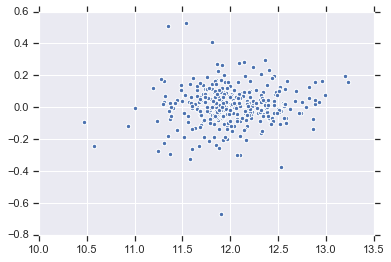

In [158]:
error = y_test_sp - pred
plt.scatter(y_test_sp,error)

In [163]:
from sklearn.feature_selection import SelectFromModel
lsf = Lasso(alpha =0.0005, random_state=1).fit(x_train_sp,y_train_sp)
modelsf = SelectFromModel(lsf, prefit=True,threshold=1e-6)
x_new = modelsf.transform(x)
print x_new.shape

(1454L, 73L)


In [169]:
modelsf.get_params()

{'estimator': Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=1,
    selection='cyclic', tol=0.0001, warm_start=False),
 'estimator__alpha': 0.0005,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__normalize': False,
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': 1,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'norm_order': 1,
 'prefit': True,
 'threshold': 1e-06}

In [171]:
zip(list(x_train_sp),list(modelsf.get_support()))

[('BsmtCond', True),
 ('BsmtExposure', True),
 ('BsmtFinType1', True),
 ('BsmtQual', True),
 ('ExterCond', True),
 ('ExterQual', True),
 ('FireplaceQu', True),
 ('Fireplaces', True),
 ('GarageArea', True),
 ('GarageFinish', False),
 ('HeatingQC', True),
 ('KitchenQual', True),
 ('LandSlope', True),
 ('LotFrontage', True),
 ('LotShape', True),
 ('MasVnrArea', True),
 ('OpenPorchSF', True),
 ('OverallQual', True),
 ('PavedDrive', True),
 ('TotalArea', True),
 ('TotalBath', True),
 ('WoodDeckSF', True),
 ('YearBuilt', True),
 ('YearRemodAdd', True),
 ('BldgType_1Fam', True),
 ('BldgType_2fmCon', False),
 ('BldgType_Duplex', False),
 ('BldgType_Twnhs', True),
 ('BldgType_TwnhsE', False),
 ('Condition1_Artery', True),
 ('Condition1_Feedr', False),
 ('Condition1_Norm', True),
 ('Condition1_PosA', False),
 ('Condition1_PosN', False),
 ('Condition1_RRAe', False),
 ('Condition1_RRAn', False),
 ('Condition1_RRNe', False),
 ('Condition1_RRNn', False),
 ('Condition2_Artery', False),
 ('Condition2_

In [177]:
lsvars = np.array(list(x_train_sp))
lsvars = lsvars[modelsf.get_support()]
print lsvars

['BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtQual' 'ExterCond'
 'ExterQual' 'FireplaceQu' 'Fireplaces' 'GarageArea' 'HeatingQC'
 'KitchenQual' 'LandSlope' 'LotFrontage' 'LotShape' 'MasVnrArea'
 'OpenPorchSF' 'OverallQual' 'PavedDrive' 'TotalArea' 'TotalBath'
 'WoodDeckSF' 'YearBuilt' 'YearRemodAdd' 'BldgType_1Fam' 'BldgType_Twnhs'
 'Condition1_Artery' 'Condition1_Norm' 'Exterior1st_BrkComm'
 'Exterior1st_BrkFace' 'Exterior1st_HdBoard' 'Exterior1st_Wd Sdng'
 'Exterior2nd_Brk Cmn' 'Exterior2nd_MetalSd' 'Foundation_BrkTil'
 'Foundation_Slab' 'GarageType_Attchd' 'GarageType_Basment'
 'GarageType_BuiltIn' 'GarageType_None' 'Heating_GasW' 'Heating_Grav'
 'HouseStyle_1Story' 'HouseStyle_2Story' 'HouseStyle_SLvl'
 'LandContour_Lvl' 'LotConfig_CulDSac' 'MSZoning_C (all)' 'MSZoning_RL'
 'MSZoning_RM' 'MasVnrType_BrkCmn' 'MasVnrType_None' 'MasVnrType_Stone'
 'Neighborhood_BrkSide' 'Neighborhood_ClearCr' 'Neighborhood_CollgCr'
 'Neighborhood_Crawfor' 'Neighborhood_Edwards' 'Neighborhood_Gilbert'

In [178]:
len(lsvars)

73

In [179]:
newx = train_data[lsvars].copy()
xtr , xtest, y_train_sp, y_test_sp = train_test_split(newx, y, test_size=0.25,random_state=11)

In [180]:
regr = LinearRegression()
regr.fit(xtr,y_train_sp)
pred = regr.predict(xtest)
print np.sqrt(mean_squared_error(y_test_sp,pred))

0.11839370877225568


0.9060013729962898


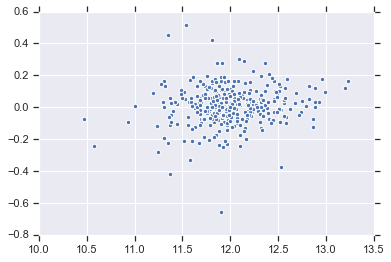

In [181]:
print r2_score(y_test_sp,pred)
error = y_test_sp - pred
plt.scatter(y_test_sp,error)

In [197]:
lasso = make_pipeline(RobustScaler(),Lasso(alpha =0.0005, random_state=1))
lasso_score = -cross_val_score(lasso,x,y,cv=10,scoring="neg_mean_squared_error")
lasso_score.mean()

0.015430783304452975

In [198]:
lnr = LinearRegression()
lasso_score = -cross_val_score(lnr,newx,y,cv=10,scoring="neg_mean_squared_error")
lasso_score.mean()

0.015159727023322944

In [203]:
lnr.fit(newx,y)
testd_sub = test_data[lsvars].copy()
test_pred = np.exp(lnr.predict(testd_sub))
test_pred.mean()

177685.92545268114